In [1]:
!python --version # Python 3.7.4

Python 3.7.4


In [2]:
# !pip3 install --upgrade pip
# !pip3 install -U numpy
# !pip3 install -U pandas
# !pip3 install -U matplotlib
# !pip3 install -U opencv-python

In [3]:
!pip freeze > requirements.txt
!cat requirements.txt

cycler==0.10.0
kiwisolver==1.2.0
matplotlib==3.2.1
numpy==1.18.2
opencv-python==4.2.0.34
pandas==1.0.3
pyparsing==2.4.7
python-dateutil==2.8.1
pytz==2019.3
six==1.14.0


### Make sure VENV Python3.7 is able to detect VENV site-packages

In [4]:
try:
    import cv2
except ModuleNotFoundError:
    # Troubles to import librares?
    # Probably /.../COMPUTER_VISION_VENV/lib/python3.7/site-packages not in os.sys.path
    # solve by: sys.path.append(PATH_TO_SITE_PACKAGES)

    import os, sys

    COMPUTER_VISION_VENV_PATH = '/Users/Patryk.Laskowski@ibm.com/Desktop/COMPUTER_VISION_VENV'
    PATH_TO_SITE_PACKAGES = os.path.join(COMPUTER_VISION_VENV_PATH, 'lib', 'python3.7', 'site-packages')

    print('\nThis path:\n%s' % (PATH_TO_SITE_PACKAGES))

    if PATH_TO_SITE_PACKAGES not in os.sys.path:
        sys.path.append(PATH_TO_SITE_PACKAGES)
        print('has just been added to os.sys.path\n')
    else:
        print('is already present in os.sys.path\n')


This path:
/Users/Patryk.Laskowski@ibm.com/Desktop/COMPUTER_VISION_VENV/lib/python3.7/site-packages
has just been added to os.sys.path



### Dependencies

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### opencv-python (cv2)

In [38]:
img = cv2.imread('images/apple_banana/train_dir/apple/apple_001.jpg', 1) # 1=RGB, 0=GreyScale
img.shape

(244, 244, 3)

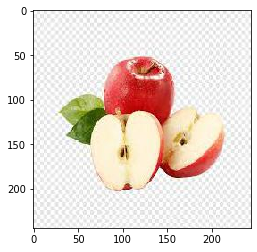

In [39]:
cv2.imshow('Widnow_name', img)

# SHOW
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
# cv2.waitKey(3000) # 3000ms = 3s # While 0 -> any key pressed closes
# cv2.destroyAllWindows()

[]

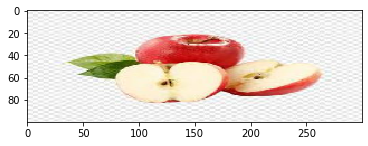

In [41]:
img = cv2.resize(img, (300, 100)) # Resize IMG

# SHOW
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.plot()
# cv2.imshow('Widnow_name', resized)
# cv2.waitKey(2000)
# cv2.destroyAllWindows()

# Front of the face detection

### IMAGE

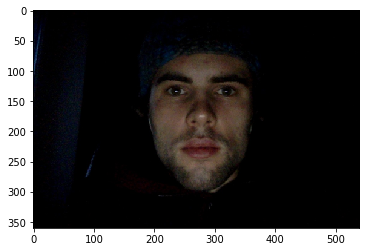

In [10]:
img = cv2.imread('images/face.jpg', 1)
img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))

# SHOW
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
# cv2.imshow('Widnow_name', img)
# cv2.waitKey(3000)
# cv2.destroyAllWindows()

In [23]:
# CascadeClassifier Object
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read RGB (1) image
img = cv2.imread('images/face.jpg', 1)

# Gray scale (0)
img_gray = cv2.imread('images/face.jpg', 0)

# Search coordinates
faces = face_cascade.detectMultiScale(img_gray,
                                      scaleFactor=1.05, # Decreases shape by 5% until face is found. Smaller val => Greater acc
                                      minNeighbors=5)

print(type(faces))
print(faces)

<class 'numpy.ndarray'>
[[332 105 456 456]]


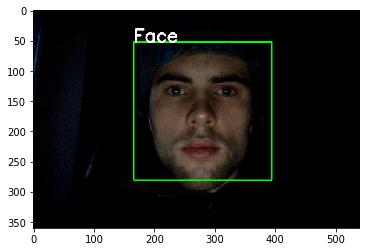

In [24]:
font = cv2.FONT_HERSHEY_SIMPLEX
# Create rectangle
for x, y, w, h in faces:
    img = cv2.rectangle(img,
                        (x, y),
                        (x+w, y+h),
                        (0, 255, 0), # RGB value of outline
                        3) # Width of rectangle
    
    img = cv2.putText(img,'Face',(x,y), font, 2,(255,255,255),5,cv2.LINE_AA)

img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))

# cv2.imread() function reads with color order as (BGR) instead fo (RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# cv2.imshow('Widnow_name', img)
# cv2.waitKey(3000)
# cv2.destroyAllWindows()

## VIDEO

In [25]:
import time

True


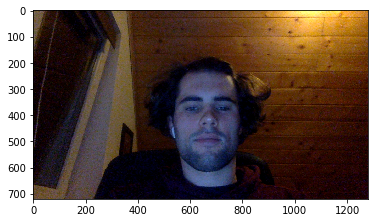

[[[111  92 103]
  [115  95 107]
  [116  97 106]
  ...
  [198 129  15]
  [207 139  18]
  [209 141  20]]

 [[111  92 103]
  [111  92 103]
  [113  94 103]
  ...
  [197 127  14]
  [208 140  19]
  [208 140  19]]

 [[109  92  80]
  [109  92  80]
  [108  93  85]
  ...
  [190 118  12]
  [201 129  14]
  [204 133  17]]

 ...

 [[ 83  57  41]
  [ 96  70  53]
  [111  81  59]
  ...
  [ 38   0  14]
  [ 46  10  23]
  [ 51  16  29]]

 [[ 84  67  53]
  [ 90  73  59]
  [ 96  82  67]
  ...
  [ 34   5  28]
  [ 29  11  31]
  [ 28  10  30]]

 [[ 95  78  63]
  [ 89  72  58]
  [ 98  83  68]
  ...
  [ 40  11  33]
  [ 28  10  30]
  [ 25   8  28]]]


In [43]:
video = cv2.VideoCapture(0)

# Get first frame
check, frame = video.read() # check [True/False] -> if frame has been captured
time.sleep(1)

# Get another frame after 1s
check, frame = video.read()

print(check)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
plt.show()

print(frame)

time.sleep(1)

video.release()

__OpenCV__ get started with video:

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html

In [34]:
######
# FACE DETECTION PART 1/2
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX
######

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
#     im = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    im = frame
    im = cv2.resize(im, (int(im.shape[1]/2), int(im.shape[0]/2)))

    
    
    #####
    # FACE DETECTION PART 2/2
    
    faces = face_cascade.detectMultiScale(im,
                                          scaleFactor=1.05,
                                          minNeighbors=5)
    
    for x, y, w, h in faces:
        im = cv2.rectangle(im,
                            (x, y),
                            (x+w, y+h),
                            (0, 255, 0), # RGB value of outline
                            3) # Width of rectangle
        
        im = cv2.putText(im,'Face',(x,y), font, 1,(255,255,255), 2, cv2.LINE_AA)

    #####
    
    
    
    
    
    # Display the resulting frame
    cv2.imshow('frame', im)
    
    key = cv2.waitKey(500) # Waits 0.5s
    
    # q key releases the camera
    if  key == ord('q'):
        break



cap.release()